In [291]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


In [292]:
#reading datastream
df = pd.read_csv('trainings_data_neu.csv')

df.head()

,date,lead_id,name,email,domain,geschlecht,lead_source,lead_quelle,kontakt_id,produkt_id,produkt_code_pl,produkt_zeitraum_c,produkt_art_der_ausbildung_c,produkt_standort,produkt_fachbereich,produkt_name,studium_beginn,product_interest_type,is_converted,has_contract
0,2023-07-12,00Q7U00000LtN4dUAF,Jana Langnau,langnaujana@gmail.com,gmail.com,weiblich,Direkt,hs-fresenius.de,0037U00000NMuYVQA1,01t7U000001FIgiQAG,MBDDIbb_Mas_WS2024_OC_BB,Berufsbegleitend,Master,Online-Campus,Fachbereich onlineplus,"Business Development & Digital Innovation, M.A.",Wintersemester 2024/25,Infomaterial (digital),False,False
1,2023-09-08,00Q7U00000OsrXDUAZ,Joel Weitekamp,j.weitekamp@outlook.com,outlook.com,männlich,Paid SEM,Google Ads,0037U00000PeS99QAF,01t7U000001FFWaQAO,KoPop_Bac_WS2023_ww_BL,Blended Learning,Bachelor,weltweit,Fachbereich onlineplus,"Kommunikationspsychologie, B.Sc.",Wintersemester 2023/24,Infomaterial (digital),True,False
2,2023-05-28,00Q7U00000FyFGoUAN,Marzena Latos,mml@hotmail.de,hotmail.de,weiblich,Direkt,charlotte-fresenius-uni.de,0037U00000NMy1YQAT,01t7U000001BhgOQAS,MPKP_Mas_SS2024_KO_VZ,Vollzeit,Master,Köln,Fachbereich Psychologie,Psychologie mit Schwerpunkt Klinische Psycholo...,Sommersemester 2024,Infomaterial (digital),False,False
3,2023-06-21,00Q7U00000K7IvuUAF,Jeannette Koch,netti.koch@gmx.de,gmx.de,weiblich,Paid SEM,Google Ads,0037U00000NMwKqQAL,01t2o00000AKDgMAAX,AGT_Bac_WS2023_ID_BBpbl,Berufsbegleitend,Bachelor,Idstein,Fachbereich Gesundheit & Soziales,Angewandte Gesundheits- und Therapiewissenscha...,Wintersemester 2023/24,Infomaterial (print),False,False
4,2022-07-22,00Q7U000004SYpHUAW,Felipe SANTOS,felipesantos93@yahoo.com.br,yahoo.com.br,männlich,Direkt,lunex-university.net,0037U00000NNXxnQAH,01t2o00000ALwHcAAL,MSMDe_Mas_WS2023_DI_VZ,Vollzeit,Master,Differdingen,Fachbereich Management,Master in Sport Management and Digitalisation,Wintersemester 2023/24,Infomaterial (digital),False,False


In [293]:
df.shape

(25894, 20)

In [294]:
# create a new column, date_parsed, with the parsed dates
df['date_parsed'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
print(df['date_parsed'].head())
df.drop(['date'], axis=1, inplace=True)
df['Year'] = df['date_parsed'].dt.year
df['Month'] = df['date_parsed'].dt.month
df.drop(['date_parsed'], axis=1, inplace=True)

0   2023-07-12
1   2023-09-08
2   2023-05-28
3   2023-06-21
4   2022-07-22
Name: date_parsed, dtype: datetime64[ns]


In [295]:
df.drop(['name', 'email', 'produkt_code_pl', 'lead_id', 'lead_quelle', "kontakt_id", "produkt_id" ], axis="columns", inplace=True)
df.head()

,domain,geschlecht,lead_source,produkt_zeitraum_c,produkt_art_der_ausbildung_c,produkt_standort,produkt_fachbereich,produkt_name,studium_beginn,product_interest_type,is_converted,has_contract,Year,Month
0,gmail.com,weiblich,Direkt,Berufsbegleitend,Master,Online-Campus,Fachbereich onlineplus,"Business Development & Digital Innovation, M.A.",Wintersemester 2024/25,Infomaterial (digital),False,False,2023,7
1,outlook.com,männlich,Paid SEM,Blended Learning,Bachelor,weltweit,Fachbereich onlineplus,"Kommunikationspsychologie, B.Sc.",Wintersemester 2023/24,Infomaterial (digital),True,False,2023,9
2,hotmail.de,weiblich,Direkt,Vollzeit,Master,Köln,Fachbereich Psychologie,Psychologie mit Schwerpunkt Klinische Psycholo...,Sommersemester 2024,Infomaterial (digital),False,False,2023,5
3,gmx.de,weiblich,Paid SEM,Berufsbegleitend,Bachelor,Idstein,Fachbereich Gesundheit & Soziales,Angewandte Gesundheits- und Therapiewissenscha...,Wintersemester 2023/24,Infomaterial (print),False,False,2023,6
4,yahoo.com.br,männlich,Direkt,Vollzeit,Master,Differdingen,Fachbereich Management,Master in Sport Management and Digitalisation,Wintersemester 2023/24,Infomaterial (digital),False,False,2022,7


In [296]:
df.rename(columns={'Year' : 'Jahr', 'Month' : 'Monat', 'name' : 'Name', 'geschlecht' : 'Geschlecht', 'domain': 'E-Mail Domain', 'lead_source' : 'Lead Quelle', 'produkt_zeitraum_c' : 'Studientyp',
       'produkt_art_der_ausbildung_c' : 'Studiengangsart', 'produkt_standort' : 'Studienort',
       'produkt_fachbereich' : 'Fachbereich', 'produkt_name': 'Studiengang', 'studium_beginn' : 'Studien Beginn',
       'product_interest_type' : 'Conversion Type', 'is_converted' : 'Konvertiert', 'has_contract' : 'Vertragsabschluss'},inplace=True)
df.head()

,E-Mail Domain,Geschlecht,Lead Quelle,Studientyp,Studiengangsart,Studienort,Fachbereich,Studiengang,Studien Beginn,Conversion Type,Konvertiert,Vertragsabschluss,Jahr,Monat
0,gmail.com,weiblich,Direkt,Berufsbegleitend,Master,Online-Campus,Fachbereich onlineplus,"Business Development & Digital Innovation, M.A.",Wintersemester 2024/25,Infomaterial (digital),False,False,2023,7
1,outlook.com,männlich,Paid SEM,Blended Learning,Bachelor,weltweit,Fachbereich onlineplus,"Kommunikationspsychologie, B.Sc.",Wintersemester 2023/24,Infomaterial (digital),True,False,2023,9
2,hotmail.de,weiblich,Direkt,Vollzeit,Master,Köln,Fachbereich Psychologie,Psychologie mit Schwerpunkt Klinische Psycholo...,Sommersemester 2024,Infomaterial (digital),False,False,2023,5
3,gmx.de,weiblich,Paid SEM,Berufsbegleitend,Bachelor,Idstein,Fachbereich Gesundheit & Soziales,Angewandte Gesundheits- und Therapiewissenscha...,Wintersemester 2023/24,Infomaterial (print),False,False,2023,6
4,yahoo.com.br,männlich,Direkt,Vollzeit,Master,Differdingen,Fachbereich Management,Master in Sport Management and Digitalisation,Wintersemester 2023/24,Infomaterial (digital),False,False,2022,7


In [297]:
missing_values_count = df.isnull().sum() # returns a pandas Series with the count of NaN (Not a Number) values in each column.
print(missing_values_count)


E-Mail Domain         133
Geschlecht            737
Lead Quelle             0
Studientyp              0
Studiengangsart         0
Studienort              0
Fachbereich            80
Studiengang            80
Studien Beginn         80
Conversion Type      4285
Konvertiert             0
Vertragsabschluss       0
Jahr                    0
Monat                   0
dtype: int64


In [298]:
# how many total missing values do we have?
total_cells = np.product(df.shape) # df.shape returns a tuple representing the dimensions of the DataFrame df, which is the number of rows and columns, np.product() takes an iterable as an argument and multiplies its elements together. So here, it multiplies the number of rows by the number of columns to give the total number of cells (or elements) in the DataFrame.
total_missing = missing_values_count.sum() # ich adds up all the individual column missing value counts to get the total number of missing values across the entire DataFrame.
print(total_missing)
print(total_cells)

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

5395
362516
1.488210175550872


In [299]:
df['Geschlecht'] = df['Geschlecht'].fillna('Unspecified')
columns_to_fill = ['Fachbereich', 'Studiengang', 'Studien Beginn', 'Conversion Type', 'E-Mail Domain']
df[columns_to_fill] = df[columns_to_fill].fillna('Unknown')

In [300]:
df.nunique()

E-Mail Domain        1601
Geschlecht              4
Lead Quelle            22
Studientyp              4
Studiengangsart         6
Studienort             16
Fachbereich            11
Studiengang           155
Studien Beginn         12
Conversion Type         4
Konvertiert             2
Vertragsabschluss       2
Jahr                    3
Monat                  12
dtype: int64

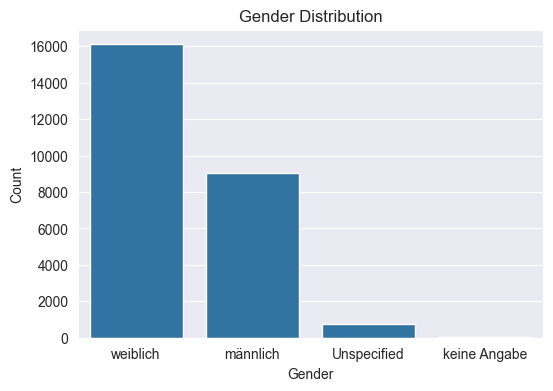

In [301]:
plt.figure(figsize=(6, 4))
gender_count = df['Geschlecht'].value_counts(dropna=False)
sns.barplot(x=gender_count.index, y=gender_count.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

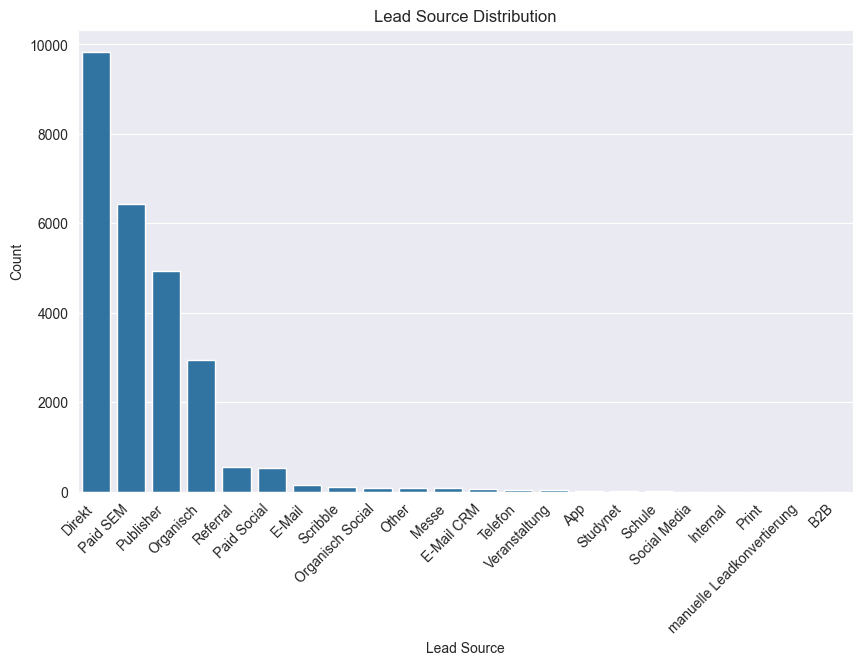

In [302]:
# 2. Lead Source Distribution
plt.figure(figsize=(10, 6))
lead_source_count = df['Lead Quelle'].value_counts(dropna=False)
sns.barplot(x=lead_source_count.index, y=lead_source_count.values)
plt.title('Lead Source Distribution')
plt.xlabel('Lead Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


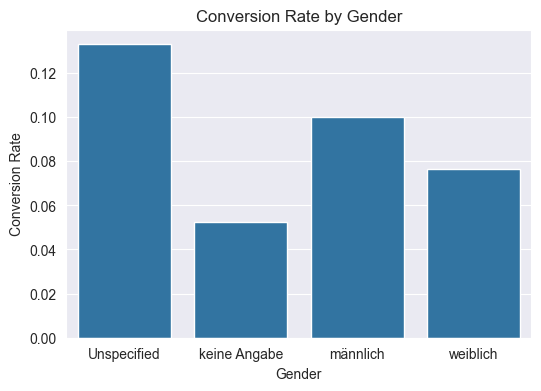

In [303]:
# 3. Conversion Rate by Gender
conversion_by_gender = df.groupby('Geschlecht')['Konvertiert'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=conversion_by_gender.index, y=conversion_by_gender.values)
plt.title('Conversion Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Conversion Rate')
plt.show()

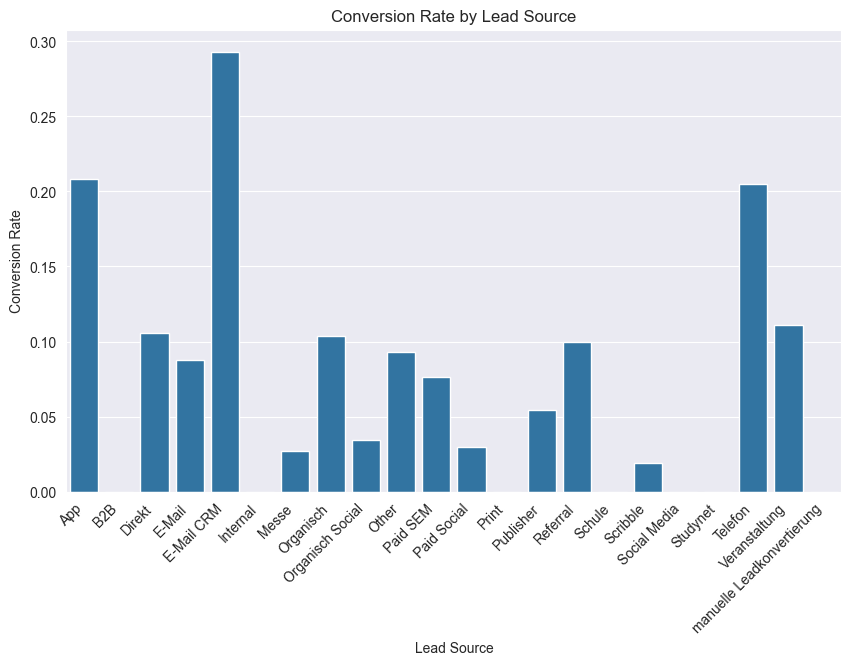

In [304]:
# 4. Conversion Rate by Lead Source
# Group by 'Lead Quelle' and calculate the conversion rate as the proportion of 'Konvertiert' that is True
conversion_by_lead_source = df.groupby('Lead Quelle')['Konvertiert'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=conversion_by_lead_source.index, y=conversion_by_lead_source.values)
plt.title('Conversion Rate by Lead Source')
plt.xlabel('Lead Source')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

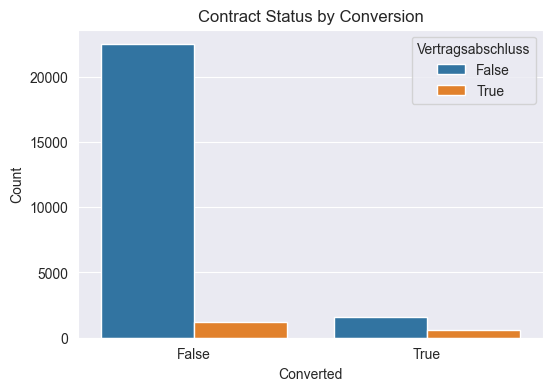

In [305]:
# 5. Contract Status by Conversion
plt.figure(figsize=(6, 4))
sns.countplot(x='Konvertiert', hue='Vertragsabschluss', data=df)
plt.title('Contract Status by Conversion')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.legend(title='Vertragsabschluss')
plt.show()

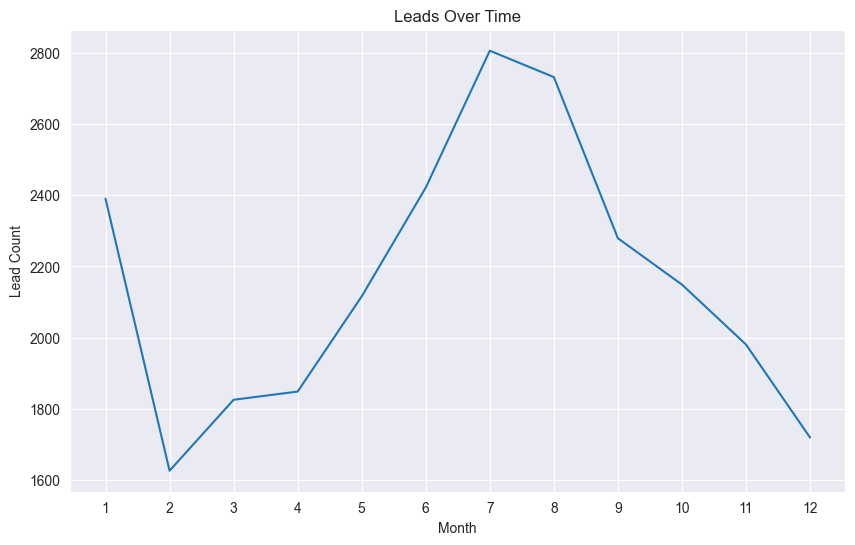

In [306]:
# 1. Leads Over Time
plt.figure(figsize=(10, 6))
leads_by_month = df['Monat'].value_counts().sort_index()
sns.lineplot(x=leads_by_month.index.astype(str), y=leads_by_month.values)
plt.title('Leads Over Time')
plt.xlabel('Month')
plt.ylabel('Lead Count')
plt.show()

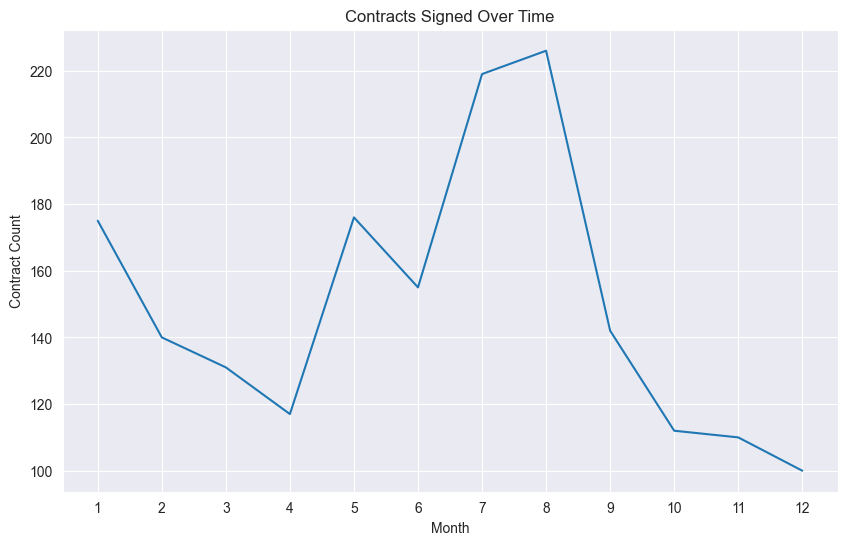

In [307]:

# Filter the data to include only rows where 'has_contract' is true
df_contract = df[df['Vertragsabschluss'] == True]

# Count the number of contracts per month
contracts_by_month = df_contract['Monat'].value_counts().sort_index()

# Create a line plot to show contracts over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=contracts_by_month.index.astype(str), y=contracts_by_month.values)
plt.title('Contracts Signed Over Time')
plt.xlabel('Month')
plt.ylabel('Contract Count')
plt.show()

In [308]:
df.dtypes

E-Mail Domain        object
Geschlecht           object
Lead Quelle          object
Studientyp           object
Studiengangsart      object
Studienort           object
Fachbereich          object
Studiengang          object
Studien Beginn       object
Conversion Type      object
Konvertiert            bool
Vertragsabschluss      bool
Jahr                  int32
Monat                 int32
dtype: object

In [309]:
# Section 1: Imports
import scipy.stats as stats  # Correct import path for chi-square tests

# Section 2: Data Preparation
# Load or ensure the DataFrame is loaded
# df = pd.read_csv('your_data.csv')

feature1= df['E-Mail Domain']
feature2= df['Vertragsabschluss']
# Example: Ensure the categorical columns are in the correct format
feature1 = feature1.astype('category')
feature2 = feature2.astype('category')

# Section 3: Contingency Table
# Create a contingency table for the chi-square test
contingency_table = pd.crosstab(feature1, feature2)

print("Contingency Table:")
print(contingency_table)

# Section 4: Chi-Square Test
# Perform the chi-square test using the correct import
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display the chi-square test results
print("\nChi-Square Test Results:")
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# Section 5: Interpretation of Results
# Significance level commonly used is 0.05
significance_level = 0.05
# Interpretation based on p-value
if p < significance_level:
    print(f"The result is statistically significant, indicating a relationship between '{feature1.name}' and '{feature2.name}'.")
else:
    print(f"The result is not statistically significant, indicating no clear relationship between '{feature1.name}' and '{feature2.name}'.")



Contingency Table:
Vertragsabschluss  False  True
E-Mail Domain                 
126.cm                 1     0
126.com                1     0
139.com                1     0
163.com                3     0
2001gmail.com          1     0
...                  ...   ...
zibert-live.com        2     0
zpp-hamm.de            1     0
zslsz.com              1     0
zweng.net              0     1
zz-systems.net         1     0

[1601 rows x 2 columns]

Chi-Square Test Results:
Chi-Square Statistic: 1355.4911674525667
Degrees of Freedom: 1600
P-value: 0.9999973502676002
The result is not statistically significant, indicating no clear relationship between 'E-Mail Domain' and 'Vertragsabschluss'.


In [310]:
from sklearn.preprocessing import LabelEncoder

# Determination categorical features
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))


In [311]:
df.columns

Index(['E-Mail Domain', 'Geschlecht', 'Lead Quelle', 'Studientyp',
       'Studiengangsart', 'Studienort', 'Fachbereich', 'Studiengang',
       'Studien Beginn', 'Conversion Type', 'Konvertiert', 'Vertragsabschluss',
       'Jahr', 'Monat'],
      dtype='object')

In [312]:
df.dtypes

E-Mail Domain        int32
Geschlecht           int32
Lead Quelle          int32
Studientyp           int32
Studiengangsart      int32
Studienort           int32
Fachbereich          int32
Studiengang          int32
Studien Beginn       int32
Conversion Type      int32
Konvertiert          int32
Vertragsabschluss    int32
Jahr                 int32
Monat                int32
dtype: object

In [313]:
df.corr()

,E-Mail Domain,Geschlecht,Lead Quelle,Studientyp,Studiengangsart,Studienort,Fachbereich,Studiengang,Studien Beginn,Conversion Type,Konvertiert,Vertragsabschluss,Jahr,Monat
E-Mail Domain,1.000000,0.051099,-0.014901,-0.108967,0.001808,0.078066,0.014067,0.013883,-0.007609,0.010468,-0.022478,0.021321,-0.031779,-0.004362
Geschlecht,0.051099,1.000000,0.052129,-0.094628,-0.078578,0.089923,-0.031850,0.003380,0.013719,-0.037148,-0.048498,0.019642,0.003101,0.000597
Lead Quelle,-0.014901,0.052129,1.000000,-0.036617,-0.060596,0.123444,0.067962,0.023810,-0.033709,0.169244,-0.066642,-0.059275,-0.088829,0.010547
Studientyp,-0.108967,-0.094628,-0.036617,1.000000,-0.170104,-0.383523,-0.083765,-0.078789,0.042127,0.018734,0.055173,-0.024914,-0.015370,-0.008523
Studiengangsart,0.001808,-0.078578,-0.060596,-0.170104,1.000000,0.040811,0.220485,0.065596,-0.126945,-0.014437,0.008602,0.054439,0.000673,-0.007611
Studienort,0.078066,0.089923,0.123444,-0.383523,0.040811,1.000000,0.433672,0.086019,-0.156922,-0.020639,-0.044487,0.006227,0.037419,0.028406
Fachbereich,0.014067,-0.031850,0.067962,-0.083765,0.220485,0.433672,1.000000,0.224088,-0.259388,-0.053076,-0.000226,0.021633,0.014882,0.042798
Studiengang,0.013883,0.003380,0.023810,-0.078789,0.065596,0.086019,0.224088,1.000000,-0.025579,0.018651,0.036282,0.049798,-0.039990,-0.023459
Studien Beginn,-0.007609,0.013719,-0.033709,0.042127,-0.126945,-0.156922,-0.259388,-0.025579,1.000000,-0.082957,0.002248,-0.008709,0.136439,0.033649
Conversion Type,0.010468,-0.037148,0.169244,0.018734,-0.014437,-0.020639,-0.053076,0.018651,-0.082957,1.000000,-0.036095,-0.048401,-0.430082,-0.327651


In [314]:
# Correlation matrix
corrmat = df.corr()
fig = ff.create_annotated_heatmap(z=corrmat.values, x=list(corrmat.columns), y=list(corrmat.index), annotation_text=corrmat.round(2).values, colorscale='tropic')
fig.update_layout(title_text='Correlation matrix with rounded numbers in size 10x10', width=1000, height=600)
fig.show()

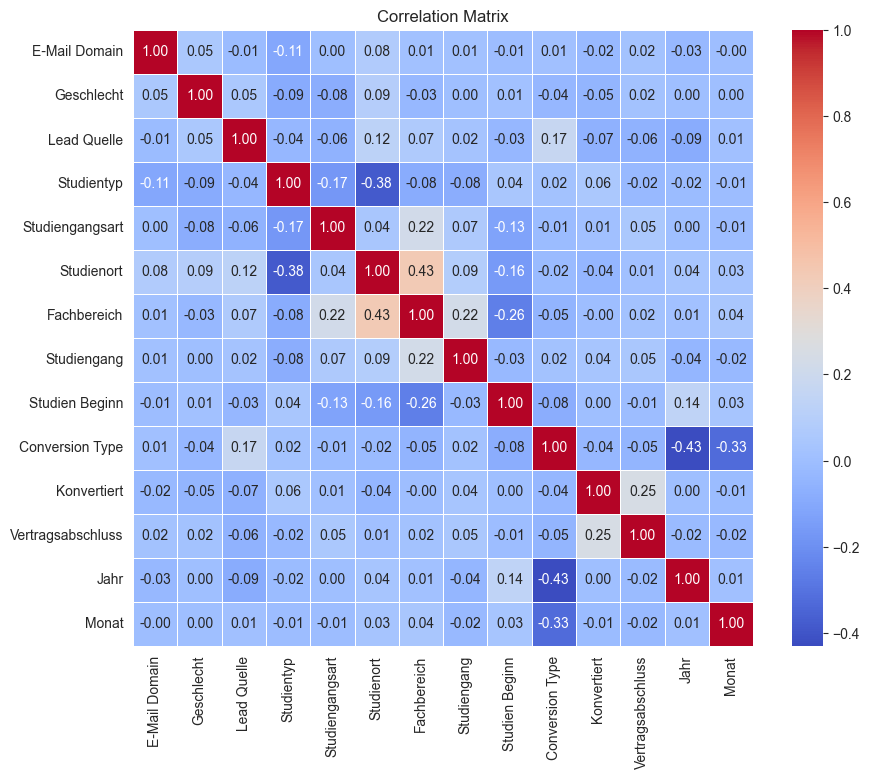

In [315]:
correlation_matrix = df.corr()
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [316]:
df.dtypes

E-Mail Domain        int32
Geschlecht           int32
Lead Quelle          int32
Studientyp           int32
Studiengangsart      int32
Studienort           int32
Fachbereich          int32
Studiengang          int32
Studien Beginn       int32
Conversion Type      int32
Konvertiert          int32
Vertragsabschluss    int32
Jahr                 int32
Monat                int32
dtype: object

In [337]:
train0 = df.dropna()
# pp.ProfileReport(train0)

In [338]:
from sklearn.model_selection import train_test_split
target_name= 'Vertragsabschluss'
train_target0 = df[target_name]
train0 = df.drop([target_name], axis=1)



In [319]:
train0, test0, train_target0, test_target0 = train_test_split(train0, train_target0, test_size=0.2, random_state=0)

In [339]:
# For boosting model
train0b = df
train_target0b = train_target0
# Synthesis valid as test for selection models
trainb, testb, targetb, target_testb = train_test_split(train0b, train_target0b, test_size=0.2, random_state=0)

In [340]:
from sklearn.preprocessing import StandardScaler

#For models from Sklearn
scaler = StandardScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)

In [322]:
df.head(10)

,E-Mail Domain,Geschlecht,Lead Quelle,Studientyp,Studiengangsart,Studienort,Fachbereich,Studiengang,Studien Beginn,Conversion Type,Konvertiert,Vertragsabschluss,Jahr,Monat
0,501,3,2,0,3,12,8,25,10,1,0,0,2023,7
1,1079,2,10,1,1,15,8,82,9,1,1,0,2023,9
2,634,3,2,3,3,9,6,121,3,1,0,0,2023,5
3,522,3,10,0,1,8,3,6,9,2,0,0,2023,6
4,1566,2,2,3,3,2,4,93,9,1,0,0,2022,7
5,522,3,11,0,5,8,3,148,9,1,0,0,2022,10
6,517,3,2,1,3,15,8,58,8,1,0,0,2022,6
7,501,3,11,3,3,3,1,53,2,2,0,0,2023,3
8,501,3,10,3,3,8,0,0,10,1,0,0,2023,7
9,522,3,11,3,3,11,6,121,9,1,0,0,2023,1


In [341]:
train0.head(3)

,E-Mail Domain,Geschlecht,Lead Quelle,Studientyp,Studiengangsart,Studienort,Fachbereich,Studiengang,Studien Beginn,Conversion Type,Konvertiert,Jahr,Monat
0,-0.611250,0.673931,-1.152958,-1.426895,0.731575,0.719978,0.923698,-1.037633,0.838297,-0.44606,-0.307355,0.82017,0.136648
1,0.782071,-0.872575,0.598435,-0.653454,-1.169896,1.370190,0.923698,0.212687,0.472769,-0.44606,3.253565,0.82017,0.740516
2,-0.290642,0.673931,-1.152958,0.893426,0.731575,0.069765,0.233845,1.068168,-1.720397,-0.44606,-0.307355,0.82017,-0.467220


In [324]:
len(train0)

20715

In [325]:
# Synthesis valid as test for selection models
train, test, target, target_test = train_test_split(train0, train_target0, test_size=0.2, random_state=0)

In [326]:
test.head(3)

,E-Mail Domain,Geschlecht,Lead Quelle,Studientyp,Studiengangsart,Studienort,Fachbereich,Studiengang,Studien Beginn,Conversion Type,Konvertiert,Jahr,Monat
18558,-0.611272,-0.864707,-1.156855,0.890466,-1.165878,-1.447594,-1.146973,-1.389349,0.474425,-0.447469,-0.307545,0.817597,0.742478
6193,-0.765472,0.674821,1.256552,-0.656304,0.732425,1.374192,0.923065,1.336443,0.474425,-0.447469,-0.307545,0.817597,1.650880
17178,0.783756,0.674821,-0.059852,-0.656304,0.732425,1.374192,0.923065,-0.729883,0.474425,-0.447469,-0.307545,0.817597,0.439678


In [327]:
test.head(3)

,E-Mail Domain,Geschlecht,Lead Quelle,Studientyp,Studiengangsart,Studienort,Fachbereich,Studiengang,Studien Beginn,Conversion Type,Konvertiert,Jahr,Monat
18558,-0.611272,-0.864707,-1.156855,0.890466,-1.165878,-1.447594,-1.146973,-1.389349,0.474425,-0.447469,-0.307545,0.817597,0.742478
6193,-0.765472,0.674821,1.256552,-0.656304,0.732425,1.374192,0.923065,1.336443,0.474425,-0.447469,-0.307545,0.817597,1.650880
17178,0.783756,0.674821,-0.059852,-0.656304,0.732425,1.374192,0.923065,-0.729883,0.474425,-0.447469,-0.307545,0.817597,0.439678


In [328]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16572 entries, 10598 to 2732
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   E-Mail Domain    16572 non-null  float64
 1   Geschlecht       16572 non-null  float64
 2   Lead Quelle      16572 non-null  float64
 3   Studientyp       16572 non-null  float64
 4   Studiengangsart  16572 non-null  float64
 5   Studienort       16572 non-null  float64
 6   Fachbereich      16572 non-null  float64
 7   Studiengang      16572 non-null  float64
 8   Studien Beginn   16572 non-null  float64
 9   Conversion Type  16572 non-null  float64
 10  Konvertiert      16572 non-null  float64
 11  Jahr             16572 non-null  float64
 12  Monat            16572 non-null  float64
dtypes: float64(13)
memory usage: 1.8 MB


In [329]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4143 entries, 18558 to 15616
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   E-Mail Domain    4143 non-null   float64
 1   Geschlecht       4143 non-null   float64
 2   Lead Quelle      4143 non-null   float64
 3   Studientyp       4143 non-null   float64
 4   Studiengangsart  4143 non-null   float64
 5   Studienort       4143 non-null   float64
 6   Fachbereich      4143 non-null   float64
 7   Studiengang      4143 non-null   float64
 8   Studien Beginn   4143 non-null   float64
 9   Conversion Type  4143 non-null   float64
 10  Konvertiert      4143 non-null   float64
 11  Jahr             4143 non-null   float64
 12  Monat            4143 non-null   float64
dtypes: float64(13)
memory usage: 453.1 KB


In [342]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []
acc_train_mae = []
acc_test_mae = []

In [343]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [344]:
def acc_boosting_model(num,model,train,test,num_iteration=0):
    # Calculation of accuracy of boosting model by different metrics

    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse, acc_train_mae, acc_test_mae

    if num_iteration > 0:
        ytrain = model.predict(train, num_iteration = num_iteration)
        ytest = model.predict(test, num_iteration = num_iteration)
    else:
        ytrain = model.predict(train)
        ytest = model.predict(test)

    print('target = ', targetb[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(targetb, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(targetb, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(targetb, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)
    acc_train_rmse.insert(num, acc_train_rmse_num)

    acc_train_mae_num = round(mean_absolute_error(targetb, ytrain) * 100, 2)
    print('acc(mae) for train =', acc_train_mae_num)
    acc_train_mae.insert(num, acc_train_mae_num)

    print('target_test =', target_testb[:5].values)
    print('ytest =', ytest[:5])

    acc_test_r2_num = round(r2_score(target_testb, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)

    acc_test_d_num = round(acc_d(target_testb, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)

    acc_test_rmse_num = round(acc_rmse(target_testb, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

    acc_test_mae_num = round(mean_absolute_error(target_testb, ytest) * 100, 2)
    print('acc(mae) for test =', acc_test_mae_num)
    acc_test_mae.insert(num, acc_test_mae_num)


In [345]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


def acc_model(num,model,train,test):
    # Calculation of accuracy of model акщь Sklearn by different metrics

    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse, acc_train_mae, acc_test_mae

    ytrain = model.predict(train)
    ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)
    acc_train_rmse.insert(num, acc_train_rmse_num)

    acc_train_mae_num = round(mean_absolute_error(target, ytrain) * 100, 2)
    print('acc(mae) for train =', acc_train_mae_num)
    acc_train_mae.insert(num, acc_train_mae_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])

    acc_test_r2_num = round(r2_score(target_test, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)

    acc_test_d_num = round(acc_d(target_test, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)

    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

    acc_test_mae_num = round(mean_absolute_error(target_test, ytest) * 100, 2)
    print('acc(mae) for test =', acc_test_mae_num)
    acc_test_mae.insert(num, acc_test_mae_num)


In [346]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(train, target)
acc_model(1,svr,train,test)

target =  [0 0 0 1 1]
ytrain =  [0.09915314 0.09074143 0.10000455 0.16130838 0.64989293]
acc(r2_score) for train = 11.31
acc(relative error) for train = 208.01
acc(rmse) for train = 23.81
acc(mae) for train = 14.27
target_test = [0 0 1 0 0]
ytest = [0.09239434 0.0993192  0.09742896 0.11796912 0.09808056]
acc(r2_score) for test = 3.57
acc(relative error) for test = 203.83
acc(rmse) for test = 25.99
acc(mae) for test = 15.45


In [335]:
from sklearn.model_selection import GridSearchCV

# GridSearch for Linear SVR

parameters = {'C': [0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVR(), parameters, refit=True, verbose=2)
grid.fit(train, target)
grid.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=  31.5s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=  31.7s


KeyboardInterrupt: 

In [350]:
from sklearn.svm import LinearSVR

# Linear SVR

linear_svr = LinearSVR(dual=True)  # Changing to True
linear_svr.fit(train, target)
acc_model(2,linear_svr,train,test)

target =  [0 0 0 1 1]
ytrain =  [-3.02488748e-12 -3.03482778e-12  1.61600394e-12 -5.20706026e-12
  1.70443693e-12]
acc(r2_score) for train = -7.37
acc(relative error) for train = 100.0
acc(rmse) for train = 26.19
acc(mae) for train = 6.86
target_test = [0 0 1 0 0]
ytest = [-4.19127603e-12  1.13759044e-12 -4.63451883e-13 -8.93704229e-12
 -4.83971504e-12]
acc(r2_score) for test = -8.2
acc(relative error) for test = 100.0
acc(rmse) for test = 27.53
acc(mae) for test = 7.58


In [351]:
# GridSearch for Linear SVR

linear_svr = LinearSVR(dual=True)
parameters = {'C': [0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [1000, 10000]}

clf = GridSearchCV(linear_svr, parameters, cv=5)
clf.fit(train, target)
clf.best_params_

C:\Users\vince\PycharmProjects\crf_lead_predictation\.venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\vince\PycharmProjects\crf_lead_predictation\.venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\vince\PycharmProjects\crf_lead_predictation\.venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\vince\PycharmProjects\crf_lead_predictation\.venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\vince\PycharmProjects\crf_lead_predictation\.venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



KeyboardInterrupt: 

In [ ]:
from sklearn.neural_network import MLPRegressor

# MLPRegressor

mlp = MLPRegressor()
param_grid = {'hidden_layer_sizes': [i for i in range(2,20)],
              'activation': ['relu'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.01],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]}
mlp_GS = GridSearchCV(mlp, param_grid=param_grid,
                      cv=10, verbose=True, pre_dispatch='2*n_jobs')
mlp_GS.fit(train, target)
acc_model(3,mlp_GS,train,test)

In [ ]:
# GridSearch for MLPRegressor

mlp = MLPRegressor(max_iter=100)

parameter = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp_GS = GridSearchCV(mlp, parameter, cv=10, verbose=True, pre_dispatch='2*n_jobs')
mlp_GS.fit(train, target)
mlp_GS.best_params_

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regression
# Individual Parameters for Decision Tree
param_grid = {'criterion': ['mse', 'friedman_mse', 'mae'],
                'splitter': ['best', 'random'],
                'max_depth': [i for i in range(2,20)],
                'min_samples_split': [i for i in range(2,20)],
                'min_samples_leaf': [i for i in range(2,20)],
                'min_weight_fraction_leaf': [0.0],
                'max_features': ['auto', 'sqrt', 'log2', None],
                'random_state': [None],
                'max_leaf_nodes': [None],
                'min_impurity_decrease': [0.0],
                'min_impurity_split': [None],
                'presort': [False]}

decision_tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=15, min_samples_split=10)
decision_tree.fit(train, target)
acc_model(5,decision_tree,train,test)

In [352]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest

#random_forest = GridSearchCV(estimator=RandomForestRegressor(), param_grid={'n_estimators': [100, 1000]}, cv=5)
random_forest = RandomForestRegressor()
random_forest.fit(train, target)
acc_model(6,random_forest,train,test)

target =  [0 0 0 1 1]
ytrain =  [0.    0.    0.15  0.82  0.885]
acc(r2_score) for train = 78.98
acc(relative error) for train = 74.93
acc(rmse) for train = 11.59
acc(mae) for train = 5.14
target_test = [0 0 1 0 0]
ytest = [0.         0.02       0.1        0.06       0.02166667]
acc(r2_score) for test = -0.23
acc(relative error) for test = 169.95
acc(rmse) for test = 26.5
acc(mae) for test = 12.88


In [ ]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(random_forest.get_params())

In [353]:
# Tuning the parameters
parameters = {'bootstrap': [True],
              'max_depth': [ 70, 80, 90],
              'max_features': [2,3,4,5,6,7],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 200, 300]}
# GridSearch
grid_search = GridSearchCV(estimator = random_forest, param_grid = parameters, cv = 5, n_jobs = -1, verbose = 2)
grid_search = grid_search.fit(train, target)
grid_search.best_params_

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


KeyboardInterrupt: 

In [354]:
import xgboost as xgb
xgb_clf = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {'n_estimators': [60, 100, 120, 140],
              'learning_rate': [0.01, 0.1],
              'max_depth': [5, 7],
              'reg_lambda': [0.5]}
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=5, n_jobs=-1).fit(trainb, targetb)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
acc_boosting_model(7,xgb_reg,trainb,testb)

Best score: 1.000
Best parameters set: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_lambda': 0.5}
target =  [0 0 0 0 0]
ytrain =  [1.8610526e-06 1.8610526e-06 1.8610526e-06 1.8610526e-06 1.8610526e-06]
acc(r2_score) for train = 100.0
acc(relative error) for train = 0.0
acc(rmse) for train = 0.0
acc(mae) for train = 0.0
target_test = [0 1 0 0 0]
ytest = [1.8610526e-06 9.9997509e-01 1.8610526e-06 1.8610526e-06 1.8610526e-06]
acc(r2_score) for test = 100.0
acc(relative error) for test = 0.01
acc(rmse) for test = 0.0
acc(mae) for test = 0.0


In [362]:
import lightgbm as lgb
Xtrain, Xval, Ztrain, Zval = train_test_split(trainb, targetb, test_size=0.2, random_state=0)
train_set = lgb.Dataset(Xtrain, Ztrain)
valid_set = lgb.Dataset(Xval, Zval)

In [366]:

params = {
    'boosting_type':'gbdt',
    'objective': 'regression',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'max_depth': -1,
    'subsample': 0.8,
    'bagging_fraction' : 1,
    'max_bin' : 5000 ,
    'bagging_freq': 20,
    'colsample_bytree': 0.6,
    'metric': 'rmse',
    'min_split_gain': 0.5,
    'min_child_weight': 1,
    'min_child_samples': 10,
    'scale_pos_weight':1,
    'zero_as_missing': False,
    'seed':0,
    'lambda_l2': 0.1,
}
modelL = lgb.train(params, train_set = train_set, num_boost_round=1000,
                   early_stopping_rounds=800,verbose_eval=500, valid_sets=valid_set)

TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [371]:
# Use function to evaluate model
acc_boosting_model(8,modelL,trainb,testb)

NameError: name 'modelL' is not defined

In [377]:
models = pd.DataFrame({
    'Model': [
              'Support Vector Machines',
            
              'Decision Tree Regressor',
              'Random Forest',
            
              'XGBoost',
              'LightGBM'],

    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'd_train': acc_train_d,
    'd_test': acc_test_d,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse,
    'mae_train': acc_train_mae,
    'mae_test': acc_test_mae
})


In [378]:
models.Model.to_list()

['Support Vector Machines',
 'Decision Tree Regressor',
 'Random Forest',
 'XGBoost',
 'LightGBM']

In [379]:
pd.options.display.float_format = '{:,.2f}'.format

In [380]:
print('Prediction accuracy for models by relative error - d_test')
models.sort_values(by=['d_test', 'd_train'], ascending=True)

Prediction accuracy for models by relative error - d_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test,mae_train,mae_test
4,LightGBM,100.00,100.00,0.00,0.01,0.00,0.00,0.00,0.00
1,Decision Tree Regressor,-7.37,-8.20,100.00,100.00,26.19,27.53,6.86,7.58
2,Random Forest,-7.37,-8.20,100.00,100.00,26.19,27.53,6.86,7.58
3,XGBoost,78.98,-0.23,74.93,169.95,11.59,26.50,5.14,12.88
0,Support Vector Machines,11.31,3.57,208.01,203.83,23.81,25.99,14.27,15.45


In [382]:
print('Prediction accuracy for models by RMSE - rmse_test')
models.sort_values(by=['rmse_test', 'rmse_train'], ascending=True)

Prediction accuracy for models by RMSE - rmse_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test,mae_train,mae_test
4,LightGBM,100.00,100.00,0.00,0.01,0.00,0.00,0.00,0.00
0,Support Vector Machines,11.31,3.57,208.01,203.83,23.81,25.99,14.27,15.45
3,XGBoost,78.98,-0.23,74.93,169.95,11.59,26.50,5.14,12.88
1,Decision Tree Regressor,-7.37,-8.20,100.00,100.00,26.19,27.53,6.86,7.58
2,Random Forest,-7.37,-8.20,100.00,100.00,26.19,27.53,6.86,7.58


In [383]:
# Plot with plotly dark theme
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=models['Model'], y=models['r2_train'], name='r2_train'))
fig.add_trace(go.Scatter(x=models['Model'], y=models['r2_test'], name='r2_test'))
fig.update_layout(title='R2-criterion for 15 popular models for train and test datasets',
                   xaxis_title='Models',
                   yaxis_title='R2-criterion, %')
fig.update_layout(template='plotly_dark')
# update size
fig.show()

In [384]:
# Plot with plotly dark theme
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=models['Model'], y=models['d_train'], name='d_train'))
fig.add_trace(go.Scatter(x=models['Model'], y=models['d_test'], name='d_test'))
fig.update_layout(title='Relative errors for 15 popular models for train and test datasets',
                   xaxis_title='Models',
                   yaxis_title='Relative error, %')
fig.update_layout(template='plotly_dark')
fig.show()

In [385]:
# Plot with plotly dark theme
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=models['Model'], y=models['rmse_train'], name='rmse_train'))
fig.add_trace(go.Scatter(x=models['Model'], y=models['rmse_test'], name='rmse_test'))
fig.update_layout(title='RMSE for 15 popular models for train and test datasets',
                   xaxis_title='Models',
                   yaxis_title='RMSE, %')
fig.update_layout(template='plotly_dark')
fig.show()


In [386]:
# Plot with plotly dark theme
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=models['Model'], y=models['mae_train'], name='mae_train'))
fig.add_trace(go.Scatter(x=models['Model'], y=models['mae_test'], name='mae_test'))
fig.update_layout(title='MAE for 15 popular models for train and test datasets',
                   xaxis_title='Models',
                   yaxis_title='MAE, %')
fig.update_layout(template='plotly_dark')
fig.show()


In [388]:
models.Model.to_list()

['LightGBM',
 'Support Vector Machines',
 'XGBoost',
 'Decision Tree Regressor',
 'Random Forest']

In [389]:
models.Model.to_list()
n_models = len(models)
models['r2_train_rank'] = models['r2_train'].rank(method='dense', ascending=False)
models['r2_test_rank'] = models['r2_test'].rank(method='dense', ascending=False)
models['d_train_rank'] = models['d_train'].rank(method='dense', ascending=False)
models['d_test_rank'] = models['d_test'].rank(method='dense', ascending=False)
models['rmse_train_rank'] = models['rmse_train'].rank(method='dense')
models['rmse_test_rank'] = models['rmse_test'].rank(method='dense')
models['mae_train_rank'] = models['mae_train'].rank(method='dense')
models['mae_test_rank'] = models['mae_test'].rank(method='dense')
models['test_ranksum'] = (models['r2_train_rank'] + models['r2_test_rank'] +
                          models['d_train_rank'] + models['d_test_rank'] +
                          models['rmse_train_rank'] + models['rmse_test_rank'] +
                          models['mae_train_rank'] + models['mae_test_rank'])
models = models.sort_values(by=['test_ranksum'], ascending=True)
models = models.sort_values(by=['test_ranksum'], ascending=True)
models = models.reset_index(drop=True)
models_rank = models[
    ['Model', 'test_ranksum', 'r2_train_rank', 'r2_test_rank', 'd_train_rank', 'd_test_rank', 'rmse_train_rank',
     'rmse_test_rank', 'mae_train_rank', 'mae_test_rank']]
models_rank

,Model,test_ranksum,r2_train_rank,r2_test_rank,d_train_rank,d_test_rank,rmse_train_rank,rmse_test_rank,mae_train_rank,mae_test_rank
0,LightGBM,14.00,1.00,1.00,4.00,4.00,1.00,1.00,1.00,1.00
1,Support Vector Machines,20.00,3.00,2.00,1.00,1.00,3.00,2.00,4.00,4.00
2,XGBoost,20.00,2.00,3.00,3.00,2.00,2.00,3.00,2.00,3.00
3,Decision Tree Regressor,26.00,4.00,4.00,2.00,3.00,4.00,4.00,3.00,2.00
4,Random Forest,26.00,4.00,4.00,2.00,3.00,4.00,4.00,3.00,2.00


In [390]:
# The three overall best performing models
print(f'----- The best performing model is ----- \n\n The {models.Model[0]} \n \n r2_train = {models.r2_train[0]} r2_test = {models.r2_test[0]} \n d_train = {models.d_train[0]} d_test = {models.d_test[0]} \n rmse_train = {models.rmse_train[0]} rmse_test = {models.rmse_test[0]} \n mae_train = {models.mae_train[0]} mae_test = {models.mae_test[0]}\n')

print(f'----- The second best performing model is ----- \n\n The {models.Model[1]} \n \n r2_train = {models.r2_train[1]} r2_test = {models.r2_test[1]} \n d_train = {models.d_train[1]} d_test = {models.d_test[1]} \n rmse_train = {models.rmse_train[1]} rmse_test = {models.rmse_test[1]} \n mae_train = {models.mae_train[1]} mae_test = {models.mae_test[1]}\n')

print(f'----- The third best performing model is ----- \n\n The {models.Model[2]} \n \n r2_train = {models.r2_train[2]} r2_test = {models.r2_test[2]} \n d_train = {models.d_train[2]} d_test = {models.d_test[2]} \n rmse_train = {models.rmse_train[2]} rmse_test = {models.rmse_test[2]} \n mae_train = {models.mae_train[2]} mae_test = {models.mae_test[2]}\n')


----- The best performing model is ----- 

 The LightGBM 
 
 r2_train = 100.0 r2_test = 100.0 
 d_train = 0.0 d_test = 0.01 
 rmse_train = 0.0 rmse_test = 0.0 
 mae_train = 0.0 mae_test = 0.0

----- The second best performing model is ----- 

 The Support Vector Machines 
 
 r2_train = 11.31 r2_test = 3.57 
 d_train = 208.01 d_test = 203.83 
 rmse_train = 23.81 rmse_test = 25.99 
 mae_train = 14.27 mae_test = 15.45

----- The third best performing model is ----- 

 The XGBoost 
 
 r2_train = 78.98 r2_test = -0.23 
 d_train = 74.93 d_test = 169.95 
 rmse_train = 11.59 rmse_test = 26.5 
 mae_train = 5.14 mae_test = 12.88
